Conexión la base de datos


In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [13]:
import mysql.connector

# Configura los detalles de tu conexión
config = {
    'user': 'benja',
    'password': 'Benja_1234',
    'host': 'localhost',
    'database': 'LastMinute',
    'raise_on_warnings': True
}

# Conecta a la base de datos
try:
    connection = mysql.connector.connect(**config)
    if connection.is_connected():
        print("Conexión exitosa a la base de datos LastMinute")
        
        cursor = connection.cursor()        
              
        # Ver las bases de datos a las que un usuario específico tiene acceso
        usuario_especifico = 'benja'  # Reemplaza con el nombre del usuario
        cursor.execute(f"SHOW GRANTS FOR '{usuario_especifico}'@'%';")
        grants = cursor.fetchall()
        print(f"Permisos para el usuario {usuario_especifico}:")
        for grant in grants:
            print(grant)
        
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    if connection.is_connected():
        # connection.close()
        print("Conexión cerrada")

Conexión exitosa a la base de datos LastMinute
Permisos para el usuario benja:
('GRANT USAGE ON *.* TO `benja`@`%`',)
('GRANT ALL PRIVILEGES ON `LastMinute`.* TO `benja`@`%`',)
('GRANT ALL PRIVILEGES ON `gymSQL`.* TO `benja`@`%`',)
Conexión cerrada


In [25]:
# Question 1: Detecting Fraudulent Activities Using SQL

import pandas as pd

# Query
query = """
        SELECT 
            b1.agency_id,
            b1.hotel_id,
            b1.booking_id AS original_booking_id,
            b1.cancelled_date,
            b2.booking_id AS new_booking_id,
            b2.booking_date AS new_booking_date,
            b2.checkin_date
        FROM 
            bookings b1
        JOIN 
            bookings b2
        ON 
            b1.hotel_id = b2.hotel_id
            AND b1.checkin_date = b2.checkin_date
            AND b1.agency_id = b2.agency_id
            AND b1.status = 'canceled'
            AND b2.status = 'confirmed'
            AND b2.source = 'manual'
            AND DATEDIFF(b2.booking_date, b1.cancelled_date) <= 1
        ORDER BY 
            b1.agency_id, b1.hotel_id, b1.cancelled_date;
        """

# Ejecuta la consulta
cursor.execute(query)
        
# Obtén los resultados
results = cursor.fetchall()
        
# Convierte los resultados a un DataFrame de pandas para una mejor visualización
df = pd.DataFrame(results, columns=['agency_id', 'hotel_id', 'original_booking_id', 'cancelled_date', 'new_booking_id', 'new_booking_date', 'checkin_date'])
print(df)

Empty DataFrame
Columns: [agency_id, hotel_id, original_booking_id, cancelled_date, new_booking_id, new_booking_date, checkin_date]
Index: []


In [22]:
# Define una consulta SQL sencilla
query = "SELECT * FROM bookings LIMIT 5;"
        
# Ejecuta la consulta
cursor.execute(query)
        
# Obtén los resultados
results = cursor.fetchall()
        
# Convierte los resultados a un DataFrame de pandas para una mejor visualización
df = pd.DataFrame(results, columns=cursor.column_names)
print(df)

   booking_id  hotel_id country booking_date checkin_date checkout_date  \
0     5547827     16691      FR   2024-05-31   2022-06-05    2022-06-06   
1     5754239     20455      FR   2024-05-15   2022-12-14    2022-12-15   
2     5754231     20455      FR   2024-05-15   2022-12-15    2022-12-16   
3     5701326     18047      FR   2024-05-19   2023-01-01    2023-01-02   
4     5701428     18047      FR   2024-05-19   2023-01-03    2023-01-04   

  cancelled_date     status  source agency_id  
0           None  confirmed  manual      None  
1           None  confirmed  manual      None  
2           None  confirmed  manual      None  
3           None  confirmed  manual      None  
4           None  confirmed  manual      None  


In [34]:
cursor = connection.cursor()
        
        # Define la consulta SQL para identificar patrones sospechosos
query = """
        WITH cancelaciones AS (
            SELECT
                agency_id,
                hotel_id,
                checkin_date,
                booking_date AS fecha_cancelacion
            FROM bookings
            WHERE status = 'cancelled'
        ),
        nuevas_reservas AS (
            SELECT
                agency_id,
                hotel_id,
                checkin_date,
                booking_date AS fecha_nueva,
                source
            FROM bookings
            WHERE source = 'booking.com' OR source = 'manual'
        )
        SELECT
            c.agency_id,
            c.hotel_id,
            c.checkin_date,
            c.fecha_cancelacion,
            n.fecha_nueva
        FROM cancelaciones c
        JOIN nuevas_reservas n
            ON c.agency_id = n.agency_id
            AND c.hotel_id = n.hotel_id
            AND c.checkin_date = n.checkin_date
            AND DATEDIFF(n.fecha_nueva, c.fecha_cancelacion) BETWEEN 0 AND 1
        ORDER BY c.agency_id, c.hotel_id, c.checkin_date, c.fecha_cancelacion;
        """
        
        # Ejecuta la consulta
cursor.execute(query)
        
        # Obtén los resultados
results = cursor.fetchall()
        
# Convierte los resultados a un DataFrame de pandas para una mejor visualización
df = pd.DataFrame(results, columns=['agency_id', 'hotel_id', 'checkin_date', 'fecha_cancelacion', 'fecha_nueva'])
print(df)

      agency_id  hotel_id checkin_date fecha_cancelacion fecha_nueva
0             2       169   2024-05-26        2024-05-22  2024-05-22
1             2       169   2024-07-13        2024-05-18  2024-05-18
2             2       173   2024-07-09        2024-05-07  2024-05-07
3             2       179   2024-06-03        2024-05-07  2024-05-07
4             2       179   2024-06-28        2024-05-27  2024-05-27
...         ...       ...          ...               ...         ...
45958         2     28032   2024-09-27        2024-06-04  2024-06-04
45959         2     28281   2024-06-11        2024-06-04  2024-06-04
45960         2     28281   2024-06-11        2024-06-04  2024-06-04
45961         2     28281   2024-06-11        2024-06-04  2024-06-04
45962         2     28281   2024-07-08        2024-06-04  2024-06-04

[45963 rows x 5 columns]


Columnas del DataFrame: Index(['month', 'payment_activation_rate'], dtype='object')
Antes de marzo de 2023:
count         11
unique         9
top       77.60%
freq           2
Name: payment_activation_rate, dtype: object
Después de marzo de 2023:
count          7
unique         7
top       79.80%
freq           1
Name: payment_activation_rate, dtype: object


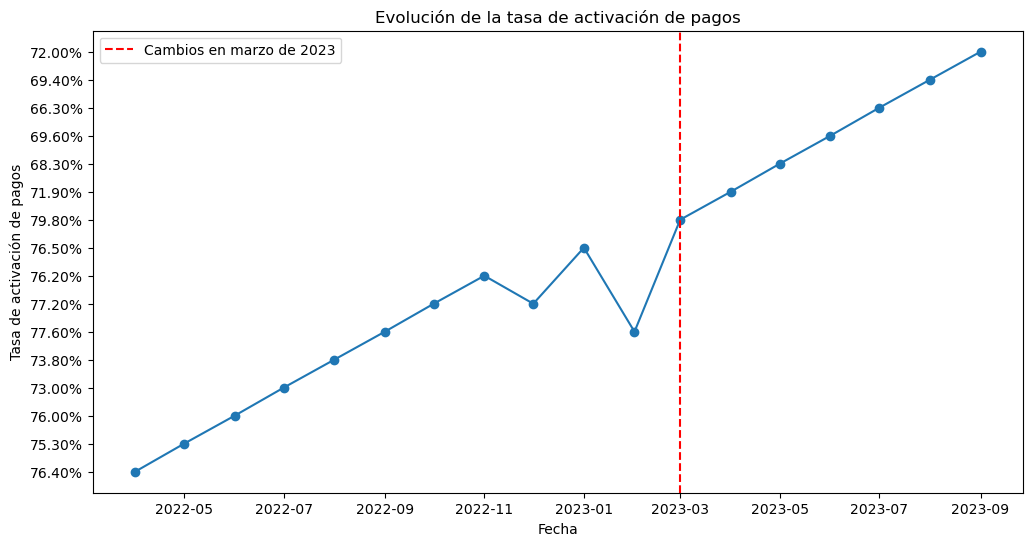

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Supongamos que tenemos un DataFrame 'payment_activation' con las columnas 'month' y 'activation_rate'
# Cargar los datos (esto es un ejemplo, ajusta según tus datos reales)
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Verificar los nombres de las columnas
print("Columnas del DataFrame:", payment_activation.columns)

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Dividir los datos en antes y después de marzo de 2023
before_march = payment_activation[payment_activation['month'] < '2023-03-01']
after_march = payment_activation[payment_activation['month'] >= '2023-03-01']

# Calcular las estadísticas descriptivas
print("Antes de marzo de 2023:")
print(before_march['payment_activation_rate'].describe())

print("Después de marzo de 2023:")
print(after_march['payment_activation_rate'].describe())

# Visualizar la tasa de activación de pagos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(payment_activation['month'], payment_activation['payment_activation_rate'], marker='o')
plt.axvline(pd.Timestamp('2023-03-01'), color='r', linestyle='--', label='Cambios en marzo de 2023')
plt.title('Evolución de la tasa de activación de pagos')
plt.xlabel('Fecha')
plt.ylabel('Tasa de activación de pagos')
plt.legend()
plt.show()

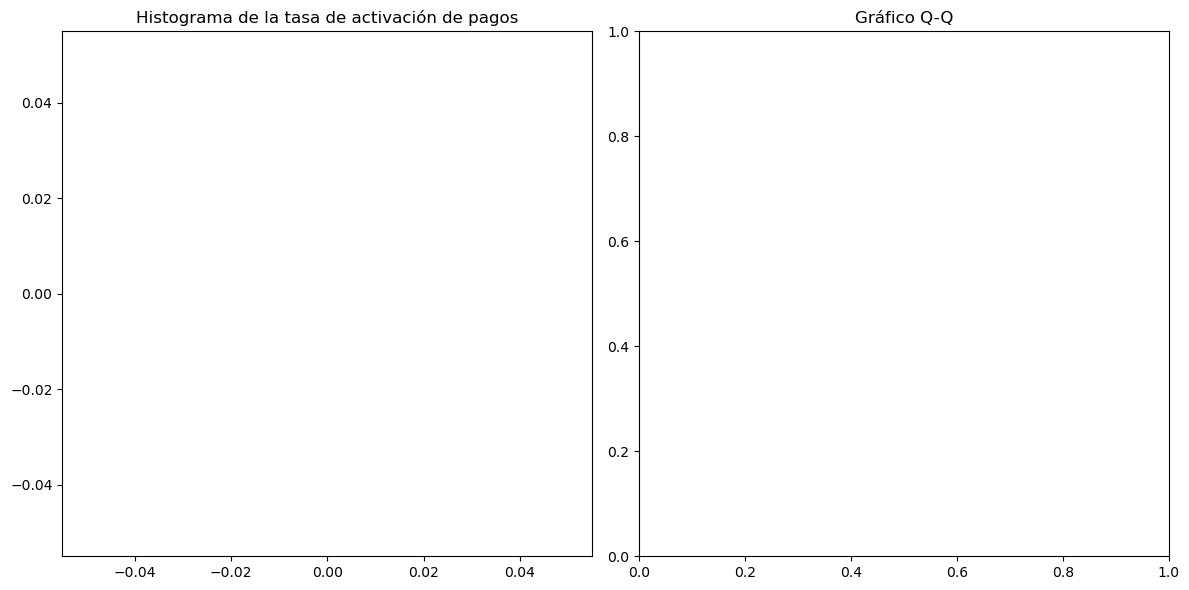

No hay suficientes datos para realizar las pruebas de normalidad. Se requieren al menos 3 valores.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, probplot

# Cargar los datos
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' contiene solo valores numéricos
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'], errors='coerce')

# Eliminar filas con valores NaN en 'payment_activation_rate'
payment_activation = payment_activation.dropna(subset=['payment_activation_rate'])

# Visualización de los datos
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(payment_activation['payment_activation_rate'], kde=True)
plt.title('Histograma de la tasa de activación de pagos')

# Gráfico Q-Q
plt.subplot(1, 2, 2)
probplot(payment_activation['payment_activation_rate'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')

plt.tight_layout()
plt.show()

# Verificar que hay al menos 3 valores en 'payment_activation_rate' antes de realizar las pruebas
if len(payment_activation['payment_activation_rate']) >= 3:
    # Prueba de Shapiro-Wilk
    stat, p_value = shapiro(payment_activation['payment_activation_rate'])
    print(f"Prueba de Shapiro-Wilk: Estadístico={stat}, p-valor={p_value}")

    # Prueba de Kolmogorov-Smirnov
    stat, p_value = kstest(payment_activation['payment_activation_rate'], 'norm', args=(payment_activation['payment_activation_rate'].mean(), payment_activation['payment_activation_rate'].std()))
    print(f"Prueba de Kolmogorov-Smirnov: Estadístico={stat}, p-valor={p_value}")

    # Interpretación de los resultados
    alpha = 0.05
    if p_value > alpha:
        print("No se puede rechazar la hipótesis nula: los datos parecen seguir una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No hay suficientes datos para realizar las pruebas de normalidad. Se requieren al menos 3 valores.")